<a href="https://colab.research.google.com/github/Pramuuu/Daily-tasks/blob/main/ml_regression_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
%matplotlib inline

In [ ]:
url = "/content/SALES.txt"
df = pd.read_csv(url, delim_whitespace=True, header=None)


<ipython-input-17-014e75a40b97>:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(url, delim_whitespace=True, header=None)


In [ ]:
print(df.shape)

(36, 2)


In [ ]:
print(df.head())

      0     1
0  12.0  15.0
1  20.5  16.0
2  21.0  18.0
3  15.5  27.0
4  15.3  21.0


In [ ]:
df.columns = ['Sales', 'Advertising'] #rename

In [ ]:
print(df.head())

   Sales  Advertising
0   12.0         15.0
1   20.5         16.0
2   21.0         18.0
3   15.5         27.0
4   15.3         21.0


In [ ]:
# View dataframe summary

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        36 non-null     float64
 1   Advertising  36 non-null     float64
dtypes: float64(2)
memory usage: 704.0 bytes
None


In [ ]:
# View descriptive statistics

print(df.describe())

           Sales  Advertising
count  36.000000    36.000000
mean   24.255556    28.527778
std     6.185118    18.777625
min    12.000000     1.000000
25%    20.300000    15.750000
50%    24.250000    23.000000
75%    28.600000    41.000000
max    36.500000    65.000000


In [ ]:
X= df['Sales'].values
y=df['Advertising'].values

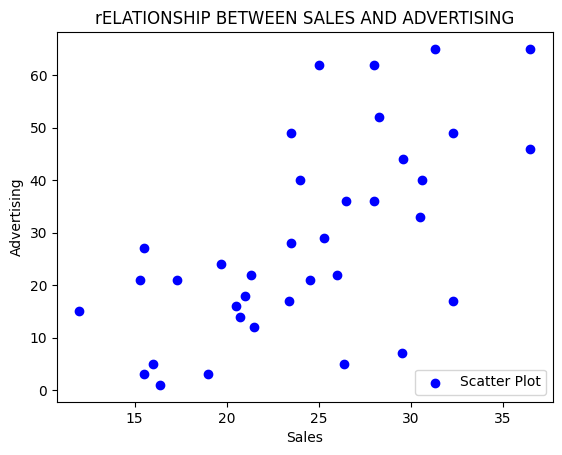

In [ ]:
plt.scatter(X,y, color='blue', label='Scatter Plot')
plt.title('rELATIONSHIP BETWEEN SALES AND ADVERTISING')
plt.xlabel('Sales')
plt.ylabel('Advertising')
plt.legend(loc=4)
plt.show()

In [ ]:
# Print the dimensions of X and y

print(X.shape)
print(y.shape)

(36,)
(36,)


In [ ]:
X = X.reshape(-1,1)
y = y.reshape(-1,1)

In [ ]:
print(X.shape)
print(y.shape)

(36, 1)
(36, 1)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33,random_state=42)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(24, 1)
(24, 1)
(12, 1)
(12, 1)


In [ ]:
#fit the linear model
#instantiate the linear regression object lm
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
#train the model using training data sets
lm.fit(X_train, y_train)
#predict on the predict data
y_pred=lm.predict(X_test)

In [ ]:
a=lm.coef_
b=lm.intercept_,
print("estimated model slope, a:",a)
print("estimated model intercept, b:",b)

estimated model slope, a: [[1.60509347]]
estimated model intercept, b: (array([-11.16003616]),)


In [ ]:
lm.predict(X)[0:5]

array([[ 8.10108551],
       [21.74438002],
       [22.54692675],
       [13.71891266],
       [13.39789396]])

In [ ]:
print(str(lm.predict(24)))

ValueError: Expected 2D array, got scalar array instead:
array=24.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
import numpy as np

prediction = lm.predict(np.array([[24]]))  # 2D array with shape (1, 1)
print(str(prediction))


[[27.36220717]]


In [ ]:
# Calculate and print Root Mean Square Error(RMSE)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE value: {:.4f}".format(rmse))

RMSE value: 11.2273


In [ ]:
# Calculate and print r2_score

from sklearn.metrics import r2_score
print ("R2 Score value: {:.4f}".format(r2_score(y_test, y_pred)))

R2 Score value: 0.5789


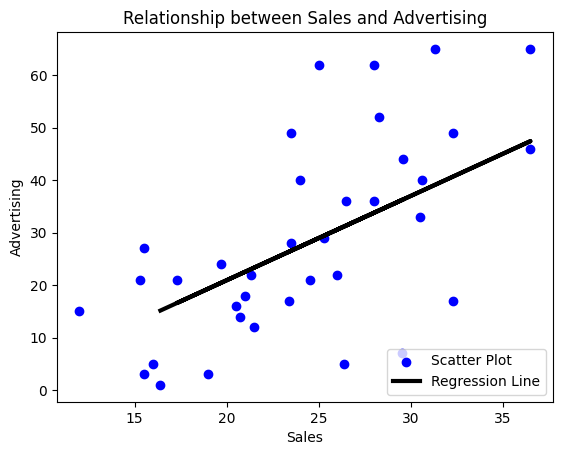

In [ ]:
# Plot the Regression Line


plt.scatter(X, y, color = 'blue', label='Scatter Plot')
plt.plot(X_test, y_pred, color = 'black', linewidth=3, label = 'Regression Line')
plt.title('Relationship between Sales and Advertising')
plt.xlabel('Sales')
plt.ylabel('Advertising')
plt.legend(loc=4)
plt.show()

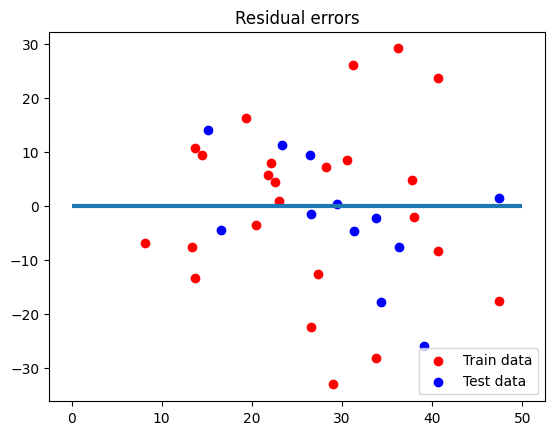

In [ ]:
# Plotting residual errors

plt.scatter(lm.predict(X_train), lm.predict(X_train) - y_train, color = 'red', label = 'Train data')
plt.scatter(lm.predict(X_test), lm.predict(X_test) - y_test, color = 'blue', label = 'Test data')
plt.hlines(xmin = 0, xmax = 50, y = 0, linewidth = 3)
plt.title('Residual errors')
plt.legend(loc = 4)
plt.show()

In [ ]:
# Checking for Overfitting or Underfitting the data

print("Training set score: {:.4f}".format(lm.score(X_train,y_train)))

print("Test set score: {:.4f}".format(lm.score(X_test,y_test)))

Training set score: 0.2861
Test set score: 0.5789


In [ ]:
# Save model for future use

from sklearn.externals import joblib
joblib.dump(lm, 'lm_regressor.pkl')

ImportError: cannot import name 'joblib' from 'sklearn.externals' (/usr/local/lib/python3.10/dist-packages/sklearn/externals/__init__.py)

In [ ]:
pip install joblib


In [ ]:
import joblib

# Save the model
joblib.dump(lm, 'lm_regressor.pkl')

# Load the model
loaded_model = joblib.load('lm_regressor.pkl')


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
import scipy.stats as ss
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import scatter_matrix
from sklearn.svm import SVR

In [ ]:
df=pd.read_csv('Twitter.data', header=None)

FileNotFoundError: [Errno 2] No such file or directory: 'Twitter.data'

##Function transformer

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [ ]:
df=pd.read_csv('/content/titanic_train.csv', usecols=['Age','Fare','Survived'])


In [ ]:
df.sample(5)

,Survived,Age,Fare
416,1,34.0,32.5000
571,1,53.0,51.4792
464,0,NaN,8.0500
511,0,NaN,8.0500
788,1,1.0,20.5750


In [ ]:
df.isnull().sum()

,0
Survived,0
Age,177
Fare,0


In [ ]:
df.fillna(df["Age"].mean(), inplace=True)

In [ ]:
X=df.iloc[:,1:]
y=df.iloc[:,0]

In [ ]:
df.isnull().sum()

,0
Survived,0
Age,0
Fare,0


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

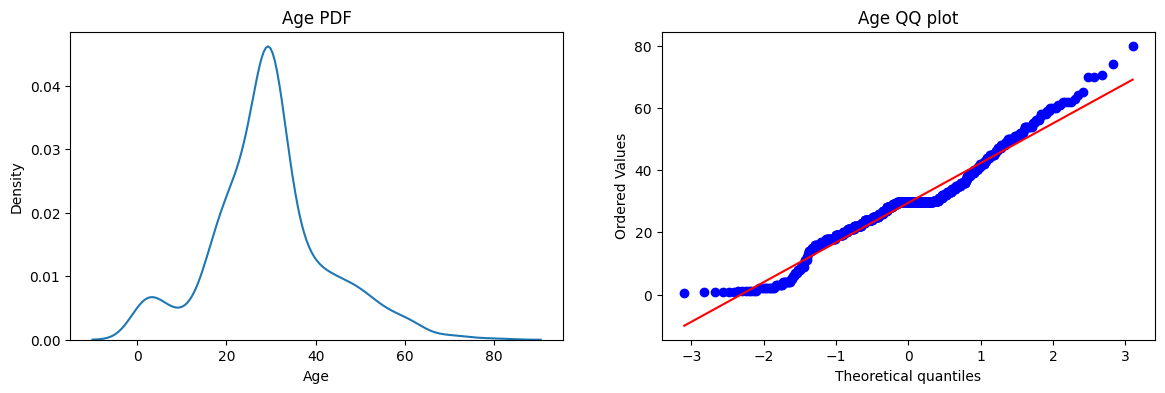

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(14,4))
ax[0].set_title('Age PDF')
sns.kdeplot(X_train['Age'], ax=ax[0])#kde plot
stats.probplot(X_train['Age'], dist='norm',plot=plt)#qq plot
ax[1].set_title("Age QQ plot")
plt.show()

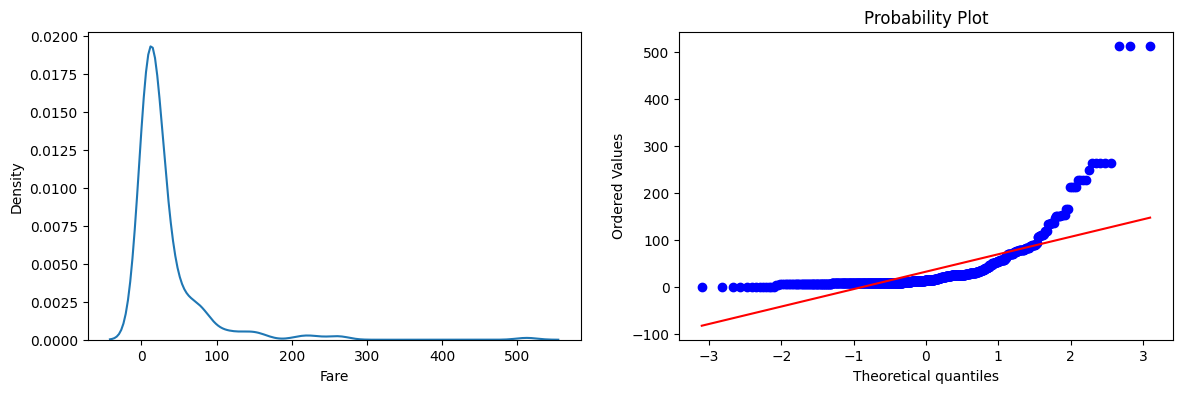

In [ ]:
fig,axes=plt.subplots(1,2,figsize=(14,4))
sns.kdeplot(X_train['Fare'],ax=axes[0])
ax[0].set_title('Fare pdf')
stats.probplot(X_train['Fare'],dist='norm',plot=plt)
ax[1].set_title('Fare QQ plot')
plt.show()

In [ ]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()

In [ ]:
clf.fit(X_train,y_train)
clf2.fit(X_train, y_train)
y_pred=clf.predict(X_test)
y_pred2=clf2.predict(X_test)
print("Accuracy LR : ", accuracy_score(y_test ,y_pred))
print("Accuracy DT : ", accuracy_score(y_test ,y_pred2))

Accuracy LR :  0.6480446927374302
Accuracy DT :  0.6815642458100558


In [ ]:
 trf1 = FunctionTransformer(func = np.log1p) #log transformation


In [ ]:
X_train_transformed =trf1.fit_transform(X_train)
X_test_transformed = trf1.fit_transform(X_test)

In [ ]:
clf.fit(X_train_transformed,y_train)
clf2.fit(X_train_transformed,y_train)

y_pred = clf.predict(X_test_transformed)
y_pred2 =clf2.predict(X_test_transformed)

print('Accuracy LR: ',accuracy_score(y_test,y_pred))
print("Accuracy DT: ",accuracy_score(y_test,y_pred2))

Accuracy LR:  0.6815642458100558
Accuracy DT:  0.6983240223463687


In [ ]:
X_transformed = trf1.fit_transform(X)

In [ ]:
print("Accuracy LR",np.mean(cross_val_score(clf,X_transformed , y ,scoring='accuracy',cv=10)))
print("Accuracy DT",np.mean(cross_val_score(clf2,X_transformed , y ,scoring='accuracy',cv=10)))

Accuracy LR 0.678027465667915
Accuracy DT 0.6566292134831461


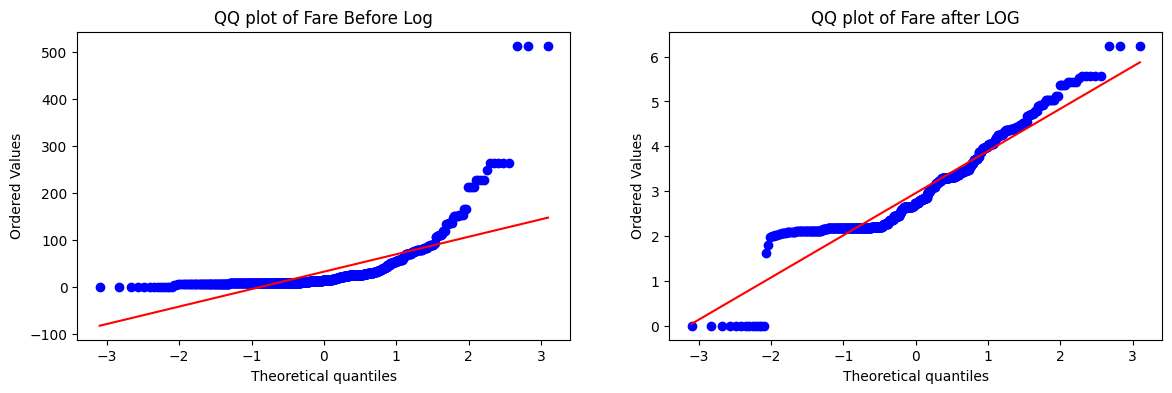

In [ ]:
fig  , axes = plt.subplots(1,2 , figsize = (14,4))

plt.subplot(121)
stats.probplot(X_train['Fare'] , dist = 'norm' , plot = plt)
plt.title('QQ plot of Fare Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'] , dist = 'norm' , plot = plt)
plt.title("QQ plot of Fare after LOG")
plt.show()

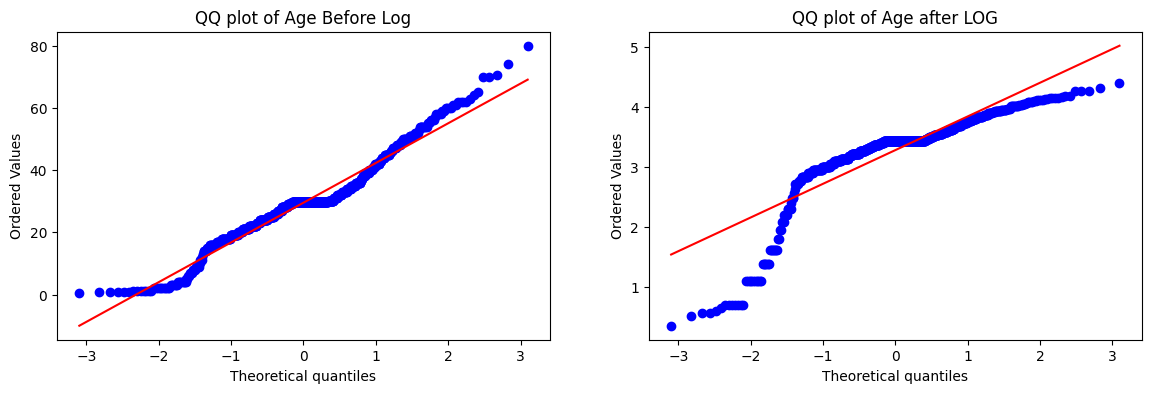

In [ ]:
fig  , axes = plt.subplots(1,2 , figsize = (14,4))

plt.subplot(121)
stats.probplot(X_train['Age'] , dist = 'norm' , plot = plt)
plt.title('QQ plot of Age Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Age'] , dist = 'norm' , plot = plt)
plt.title("QQ plot of Age after LOG")
plt.show()

In [ ]:
trf2 = ColumnTransformer([
    ('log' ,FunctionTransformer(np.log1p),['Fare'])
] , remainder = 'passthrough')

X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)

In [ ]:
clf.fit(X_train_transformed2 ,y_train)
clf2.fit(X_train_transformed2,y_train)

y_pred = clf.predict(X_test_transformed2)
y_pred2 = clf2.predict(X_test_transformed2)

print("Accuracy LR : ",accuracy_score(y_test ,y_pred))
print("Accuracy DT : " ,accuracy_score(y_test,y_pred2))

Accuracy LR :  0.6703910614525139
Accuracy DT :  0.664804469273743


In [ ]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]

    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')

    X_trans = trf.fit_transform(X)

    clf = LogisticRegression()

    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))

    plt.figure(figsize=(14,4))
    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('QQ plot of Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('QQ plot of Fare After Transform')

    plt.show()

Accuracy 0.6589013732833957


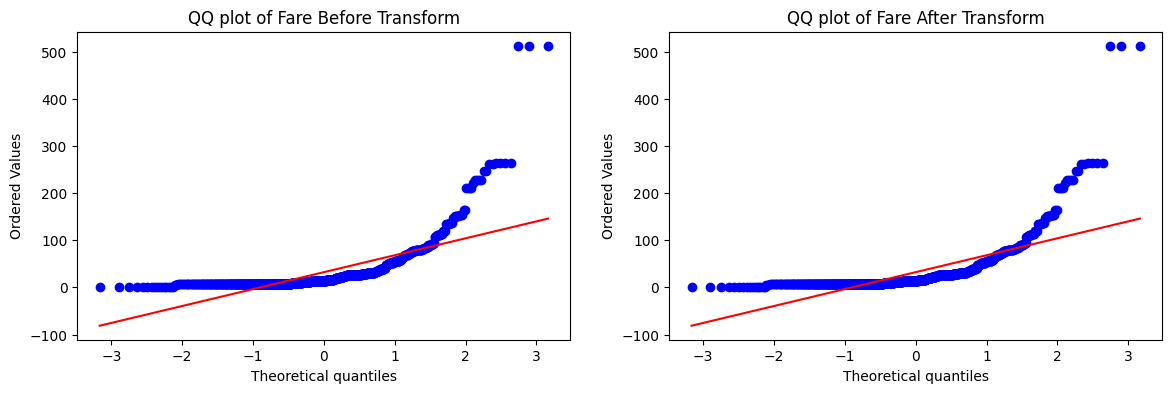

In [ ]:
apply_transform(lambda x:x)

Accuracy 0.6431335830212235


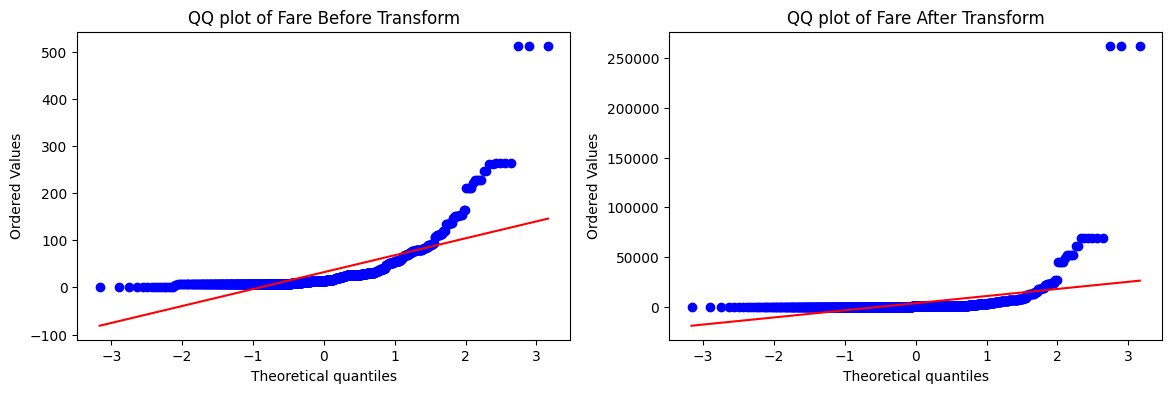

In [ ]:
apply_transform(lambda x :x**2) # Squared transform is not performing better , it is mostly used on left skewed data

Accuracy 0.6262796504369538


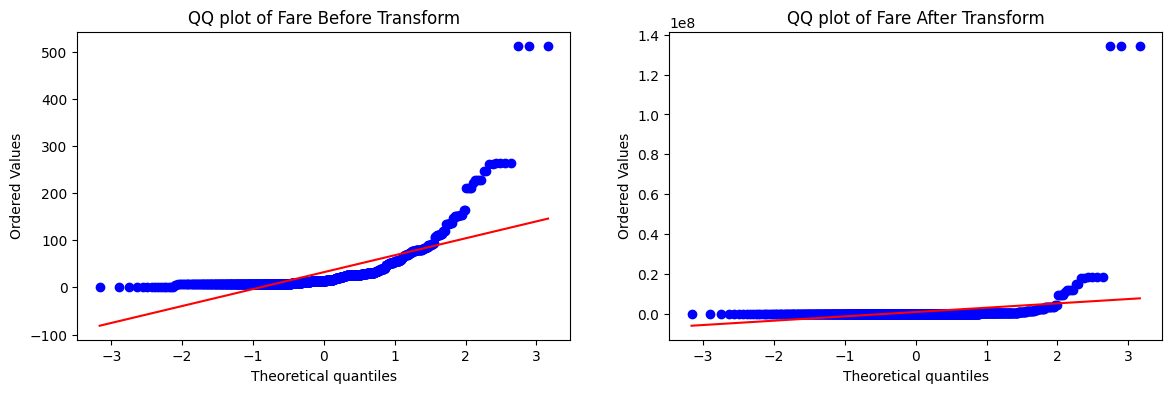

In [ ]:
apply_transform(lambda x :x**3)

Accuracy 0.6589013732833957


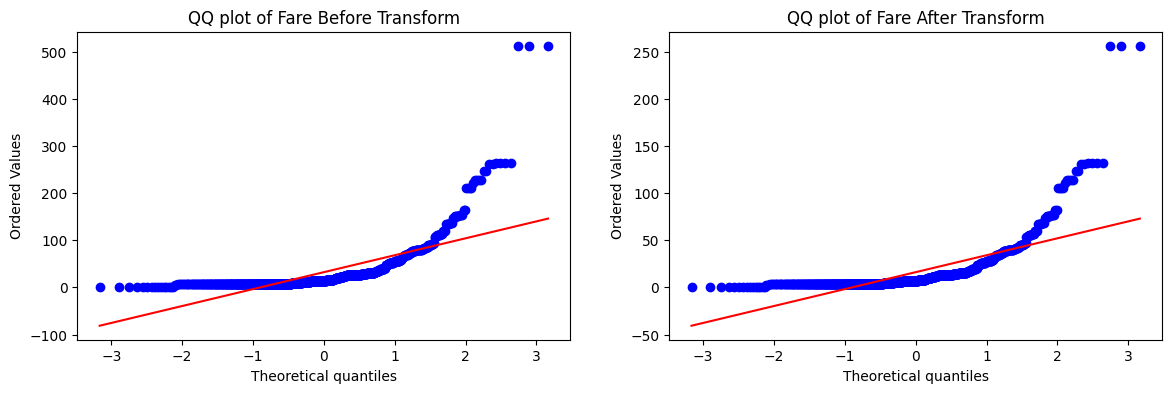

In [ ]:
apply_transform(lambda x :x**1/2) # sqrt

Accuracy 0.61729088639201


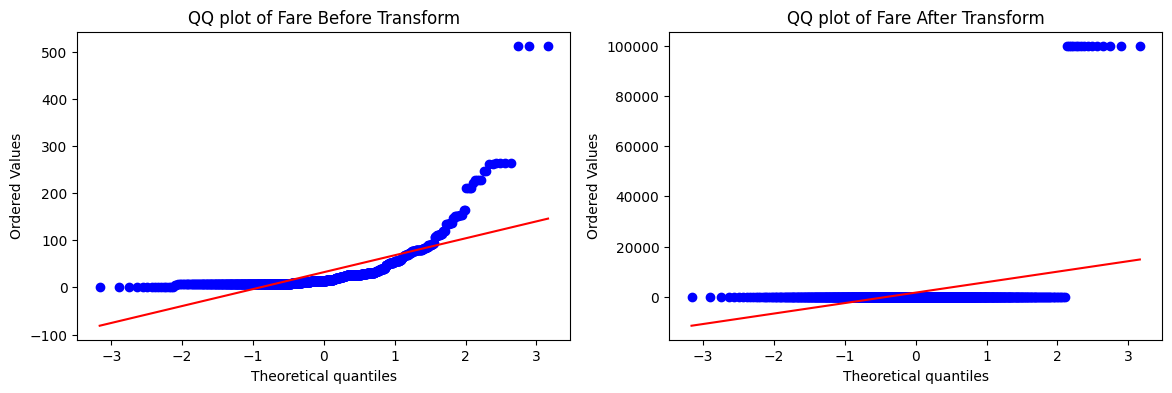

In [ ]:
apply_transform(lambda x: 1/(x+0.00001)) #reciprocal

Accuracy 0.616167290886392


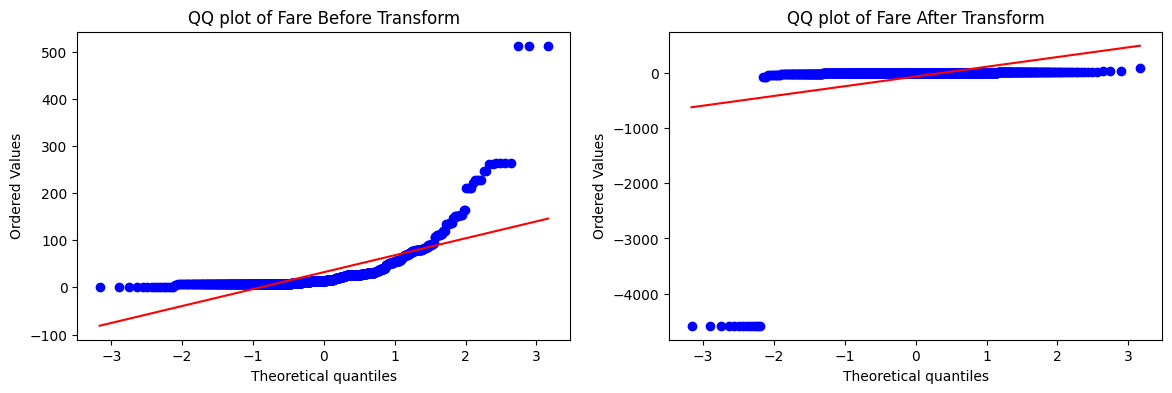

In [ ]:
apply_transform(np.tan) #custom transform